## Analysis of the dataset IRS public data. 
This data is public data released by the IRS about personal income taxes filed
during the 2013 tax year.
Columns in this dataset: 
1. STATE: 2 letter state abbreviation
2. zipcode: 5 digit ZIP code. If this is 0, the row refers to the whole state.
3. agi_stub: A categorical of 1-6
            1 = $1 under $25,000
            2 = $25,000 under $50,000
            3 = $50,000 under $75,000
            4 = $75,000 under $100,000
            5 = $100,000 under $200,000
            6 = $200,000 or more
4. num_returns: The total number of returns represented by this row.
5. num_single_returns: Total number of returns with a filing status of "single."
6. num_joint_returns: Total number of returns with a filing status of "married, filing jointly."
7. num_head_of_household_returns: Total number of returns with a filing status of"head of household."
8. num_paid_preparer_returns: Total number of returns with a paid preparer's signature. Returns prepared by tax stores and accountants have paid preparer's signatures.
9. num_exemptions: Summed total number of exemptions claimed on form 1040, line 6D.
10. num_dependents: Summed total number of dependents claimed on forms 1040, line 6C.
11. amount_agi: Summed total adjusted gross income claimed on forms 1040, line 37; 1040A, line 21; 1040EZ line 4.
12. num_returns_with_refunds: Total number of returns that claim refunds of overpayment on forms 1040, line 73; 1040A, line 42; 1040EZ, line 11A.
13. amount_refunds: Summed total amount of overpayments refunded.

In [270]:
import pandas as pd

# loading dataset from file into dataframe
tax_data = pd.read_csv("irs_public_data.csv")
print(tax_data.shape)
print(tax_data.head())

(166740, 13)
  STATE  zipcode  agi_stub  num_returns  num_single_returns  \
0    AL        0         1       870380              488030   
1    AL        0         2       490960              195840   
2    AL        0         3       258810               72710   
3    AL        0         4       163290               24860   
4    AL        0         5       192050               16930   

   num_joint_returns  num_head_of_household_returns  \
0             122290                         247000   
1             155230                         125280   
2             146880                          32860   
3             126480                           9790   
4             168170                           5450   

   num_paid_preparer_returns  num_exemptions  num_dependents  amount_agi  \
0                     500770         1452580          571240    11255896   
1                     286130         1027850          383240    17632481   
2                     157670          594910     

There are 13 columns and 166740 rows in this dataset.

In [271]:
# describe function returns us some statistics related to this dataset
tax_data.describe(include='all')

,STATE,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
count,166740,166740.000000,166740.00000,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05
unique,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48853.603275,3.50000,1.724367e+03,7.971176e+02,6.347534e+02,2.600802e+02,9.485901e+02,3.409576e+03,1.157908e+03,1.096239e+05,1.327396e+03,3.881419e+03
std,NaN,27140.030936,1.70783,3.691829e+04,2.128297e+04,1.136490e+04,7.082008e+03,2.065656e+04,6.753642e+04,2.421713e+04,2.328810e+06,2.991368e+04,7.812841e+04
min,NaN,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,27019.000000,2.00000,6.000000e+01,0.000000e+00,4.000000e+01,0.000000e+00,4.000000e+01,1.400000e+02,4.000000e+01,3.910000e+03,4.000000e+01,1.270000e+02
50%,NaN,48864.500000,3.50000,2.300000e+02,6.000000e+01,1.100000e+02,0.000000e+00,1.400000e+02,5.000000e+02,1.500000e+02,1.429400e+04,1.600000e+02,5.060000e+02
75%,NaN,70581.000000,5.00000,9.300000e+02,2.900000e+02,3.900000e+02,8.000000e+01,5.300000e+02,1.960000e+03,5.900000e+02,5.593575e+04,6.600000e+02,2.042000e+03


It seems like this dataset doesn't have NULL values, but it has 0s in some columns which doesn't make sense except for the column representing zipcode. I now would like to check if the rows containing zipcode=0 have any 0s in their columns, because for my analysis I would like to use information related to the entire state. But in case if I needed the rest of the rows for my analysis, I would've filled in missing values with the mean for that column, but considering mean values for each state, since states have very varying populations in general and it wouldn't make sense to use mean for the entire column. 

In [272]:
tax_data.isnull().values.any()
# we do not have any NULL values in this dataset, but we do have 0s, which are also missing values in this case

False

In [273]:
# Checking if rows representing whole state information have any 0s in columns.
stats_for_states = tax_data['zipcode']==0
stats_for_states = tax_data[stats_for_states]
stats_for_states.describe()

,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
count,306.0,306.000000,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02
mean,0.0,3.500000,4.696893e+05,2.170921e+05,1.728281e+05,7.080029e+04,2.583320e+05,9.288186e+05,3.153614e+05,2.986714e+07,3.615388e+05,1.057497e+06
std,0.0,1.710623,7.233092e+05,4.471585e+05,2.016134e+05,1.493808e+05,4.075801e+05,1.275373e+06,4.695071e+05,4.538892e+07,5.979236e+05,1.485917e+06
min,0.0,1.000000,7.620000e+03,8.000000e+02,4.010000e+03,1.700000e+02,5.900000e+03,2.140000e+04,6.750000e+03,1.172826e+06,2.190000e+03,3.080200e+04
25%,0.0,2.000000,8.681500e+04,1.385250e+04,4.617250e+04,3.380000e+03,4.913500e+04,1.990000e+05,5.948000e+04,6.801959e+06,5.018250e+04,2.087820e+05
50%,0.0,3.500000,2.307550e+05,5.698000e+04,1.135850e+05,1.522500e+04,1.275250e+05,5.424350e+05,1.775100e+05,1.529494e+07,1.584900e+05,5.522975e+05
75%,0.0,5.000000,5.416475e+05,2.076375e+05,2.230775e+05,6.895000e+04,2.955100e+05,1.181175e+06,3.823500e+05,3.349279e+07,4.190750e+05,1.241581e+06
max,0.0,6.000000,6.411100e+06,4.279670e+06,1.561300e+06,1.156030e+06,3.905760e+06,1.036946e+07,3.834490e+06,4.439737e+08,5.136160e+06,1.054220e+07


As we can see there are no 0s in those rows, since min value is always larger than 0 except zipcode which is correct. Therefore, I do not need to do any data cleaning, since I am only using rows representing entire state.

Now I would like to make some visualizations and see some trends and interesting observations related to this data. First question that comes to my mind is what is the distribution of the number of returns over the states. To do this I need to get only the rows where zipcode=0 (because that is a stats for the whole state). Then, I need to group by the STATE column since the result is still divided in terms of different agi_stub values (which are categories 1-6). Then, I generate a simple bar graph showing total num_returns for different states. Another question that came to my mind is what is the ratio or difference between num_single_returns and num_joint_returns in each state. Therefore, when grouping by the STATE value, I also computed aggregations for those columns that are of interest to me.

In [274]:
# choosing rows related to entire state
stats_for_states = tax_data['zipcode']==0
stats_for_states = tax_data[stats_for_states]

# columns I am interested in are num_returns, num_single_returns, num_joint_returns, 
# and amount_agi for doing the aggregation
groupby_state = stats_for_states.groupby('STATE',as_index=False).agg({'num_returns':'sum',
                                                                      'num_single_returns':'sum',
                                                                      'num_joint_returns':'sum',
                                                                     'amount_agi':'sum'})
print(groupby_state.head(10))

  STATE  num_returns  num_single_returns  num_joint_returns  amount_agi
0    AK       355150              181710             127490    23033908
1    AL      2022380              801900             761240   105089761
2    AR      1203050              481760             488410    62120570
3    AZ      2765040             1217100            1037290   158182203
4    CA     16861400             7945140            6110900  1209190396
5    CO      2460980             1169550             967150   167306854
6    CT      1726510              841240             626230   155533337
7    DC       326630              208920              53800    27506754
8    DE       435110              203880             155610    26444434
9    FL      9130210             4306300            3030630   540735119


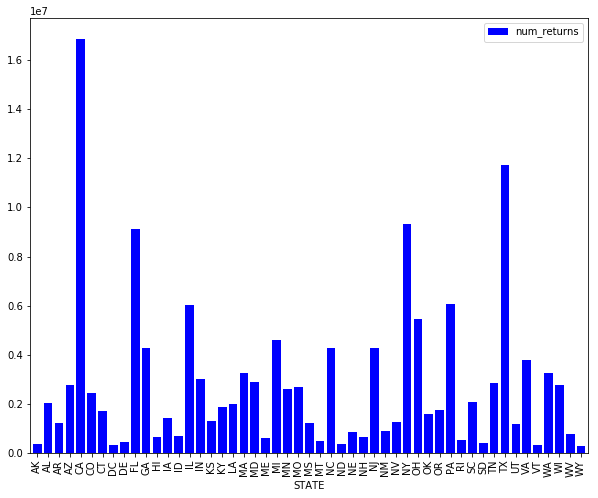

In [281]:
# Bar graph for total num_returns vs STATE. 
groupby_state.plot.bar(x='STATE',y='num_returns',figsize=(10,8),width=0.8,color='blue')

In the bar graph above we see that number of returns filed in each state is varying, this probably is mostly related to the fact that some of those states are more populated than others. 

Now let's make a visualization that will help us compare num_single_returns and num_joint_returns for each state.

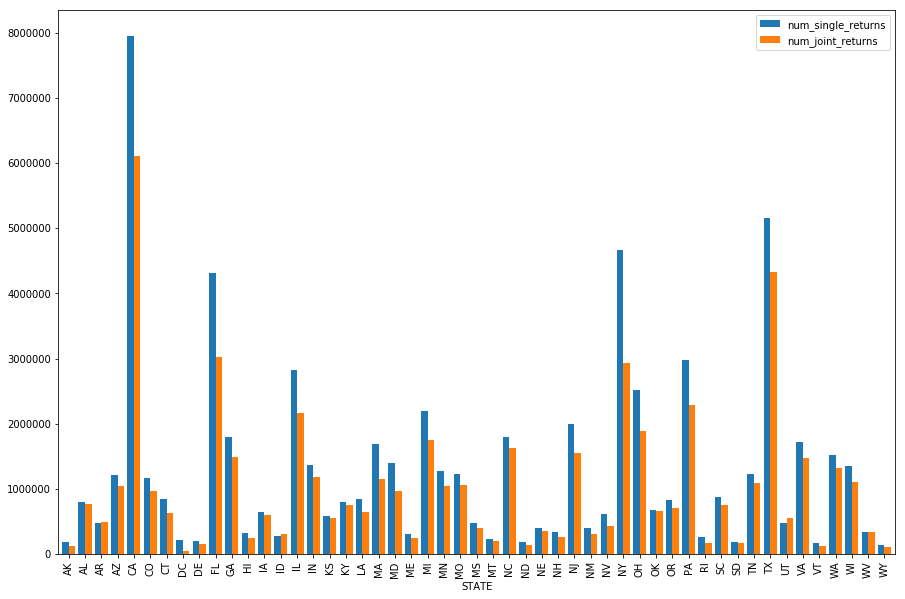

In [282]:
groupby_state.plot(x='STATE', y=['num_single_returns', 'num_joint_returns'], kind="bar",
                   figsize=(15,10),width=0.8)
#groupby_state.plot.barh(x='STATE',y=['num_single_returns', 'num_joint_returns'],figsize=(10,15),width=0.8)

The graph above represents number of single returns vs joint returns in different states in USA. 
Conclusions: in AR - Arkansas, ID - Idaho, UT - Utah joint returns are higher than single returns.
In WV - West Virginia they are almost equal.
In all other states single returns are higher than joint returns. Another interesting observation is that in DC the ratio between joint returns and single returns is very low in comparison to other states. 

Now, I would like to see how many returns fall into each category of agi_stub (categories 1-6) for each state. I would like to visualize those values and see the trend taking place in these values. 

In [283]:
# renaming the column in my groupby_state from num_returns to total_num_returns for this state
groupby_state.rename(columns={'num_returns':'total_num_returns'}, inplace=True) 

# this operation merges two dataframes based on the value of STATE so that I can get 
# a value for each category 1-6 num_returns and total_num_returns for each state 
joined_stats = stats_for_states.merge(groupby_state, left_on='STATE', right_on='STATE', 
                                      how='inner')[['STATE', 'agi_stub','num_returns','total_num_returns']]
print(joined_stats.head())

# for each state take the value of num_returns in each category and divide by the total_num_returns for
# this state to get the percentage value, so that we can actually compare different states to each other
joined_stats['percentage'] = 100*(joined_stats['num_returns']/joined_stats['total_num_returns'])
joined_stats.head(10)

  STATE  agi_stub  num_returns  total_num_returns
0    AL         1       870380            2022380
1    AL         2       490960            2022380
2    AL         3       258810            2022380
3    AL         4       163290            2022380
4    AL         5       192050            2022380


,STATE,agi_stub,num_returns,total_num_returns,percentage
0,AL,1,870380,2022380,43.037411
1,AL,2,490960,2022380,24.276348
2,AL,3,258810,2022380,12.797298
3,AL,4,163290,2022380,8.074150
4,AL,5,192050,2022380,9.496237
5,AL,6,46890,2022380,2.318555
6,AK,1,121230,355150,34.134873
7,AK,2,80690,355150,22.719977
8,AK,3,51340,355150,14.455864
9,AK,4,35610,355150,10.026749


Now I would like to visualize this information from joined_stats dataframe as a heatmap, the idea is to be able to compare different states between each other and also to compare different adjusted gross income categories for those. 

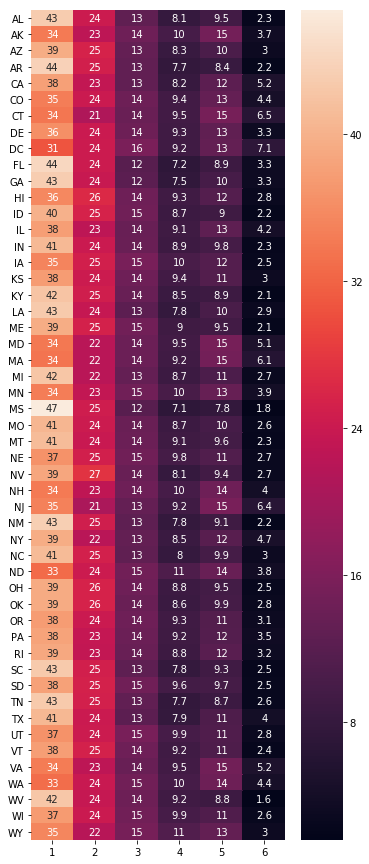

In [284]:
import seaborn as sns
import numpy as np 
from matplotlib import rcParams
%matplotlib inline

Index= joined_stats['STATE'].unique()
Cols = ['1','2','3','4','5','6']
# for visualizing a heatmap we need to pass a 2D array into the plot method
# therefore we create an empty array first of the size we need, 51 states vs 6 categories of agi_stub
arr = np.zeros([51,6]) 
# let's fill the arr now with correct values 
k = 0
m = 0
for i in joined_stats['STATE'].unique():
    m=0
    for j in joined_stats['agi_stub'].unique():
        pred1 = joined_stats['STATE']==i 
        pred2 = joined_stats['agi_stub']==j
        
        row = joined_stats[pred1 & pred2]
        arr[k,m] = row['percentage'] 
        m = m+1
    k = k+1
    
# figure size in inches
rcParams['figure.figsize'] = 5.7,15.27
df = pd.DataFrame(arr, index=Index, columns=Cols)
sns.heatmap(df, annot=True)

The heatmap above represents percentage of returns taking place in each category of adjusted gross income. The darker the cell in the heatmap the smaller is the proportion of returns in that category of agi and opposite for the lighter cells (larger proportion). 

The overall trend that we see is such that the percentage of returns in the last category of agi = 6 is very small in comparison to other categories for all states. This is something that I expected to see in the data. But there are other conclusions we can draw from this graph.   

For example if we look at all cells for the category 6 of agi, cells with lighter color will mean that those states have higher percentage of returns with agi in the range "\\$200,000 or more" compared to other states. We can see that states such as CA, CT, DC, MD, MA, NJ, VA have lighter color for that column in comparison to the rest. Probably this means that those states have higher percentage of population earning money in this range.  

For the category of agi = 1, i.e. agi is in the range "\\$1-\\$25,000", the cells with lighter color show states that have a high proportion of returns in this category, meaning they have more people who earn money in this lower range. For example, states like AL, AR, FL, GA, MS, NM, SC, TN, WV are very light colored for this category. 

Another very interesting trend I see from this heatmap, is that for most of the states the percentage of people filing taxes with adjusted gross income being in the range "\\$75,000-\\$100,000" is smaller than the percentage of people with agi in the range "\\$100,000-\\$200,000", which isn't something that I necessarily expected to see in the data (because we see that column with agi_stub = 4 is darker than agi_stub=5).

Now, I just briefly want to see what is the percentage of returns that is filled and prepared by tax stores and accountants for each state and for each category of agi_stub. Is there any correlation between the income or agi of the population vs whether or not they prepare their taxes themselves or through agency? I think this kind of information might be specifically very interesting and useful for Intuit.  

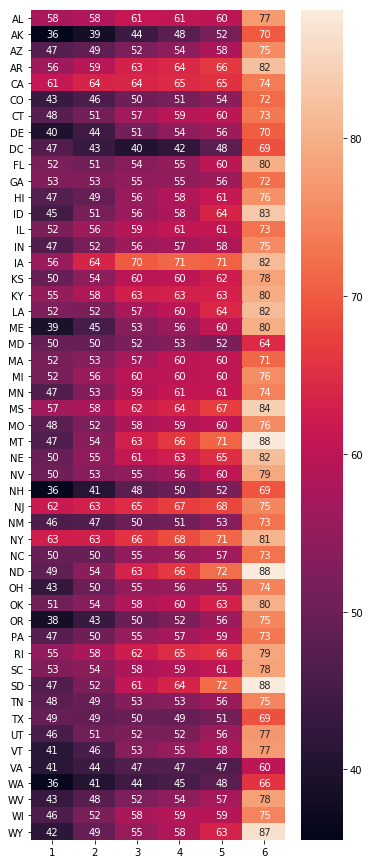

In [285]:
stats_for_states = pd.DataFrame(stats_for_states) # doing this because of a warning from pandas
stats_for_states['ratio_paid_preparer_returns']=100*(stats_for_states['num_paid_preparer_returns']/stats_for_states['num_returns'])

# Make a visualization heatmap again but this time it will show the percentage of returns in each category 
# that were prepared by the tax stores and accountants 
Index= stats_for_states['STATE'].unique()
Cols = ['1','2','3','4','5','6']
# for visualizing a heatmap we need to pass a 2D array into the plot method
# therefore we create an empty array first of the size we need, 51 states vs 6 categories of agi_stub
arr = np.zeros([51,6]) 
# let's fill the arr now with correct values 
k = 0
m = 0
for i in Index:
    m=0
    for j in stats_for_states['agi_stub'].unique():
        pred1 = stats_for_states['STATE']==i 
        pred2 = stats_for_states['agi_stub']==j
        
        row = stats_for_states[pred1 & pred2]
        arr[k,m] = row['ratio_paid_preparer_returns'] 
        m = m+1
    k = k+1
    
# figure size in inches
rcParams['figure.figsize'] = 5.7,15.27
df = pd.DataFrame(arr, index=Index, columns=Cols)
sns.heatmap(df, annot=True)

The above heatmap is showing the percentage of returns prepared by tax stores and accountants rather than personally by the individuals or by tax software in different states and different categories of agi_stub. The trend is quite interesting. We can see that the percentage of tax returns in the category of agi_stub = 6, i.e. agi is in the range \\$200,000 or higher,  that are filed and prepared by tax stores and accountants is very high in comparison to other categories of agi_stub. It seems reasonable to some extent since it says that most of the people earning \\$200,000 or higher use the services of special agencies or their accountants to prepare tax returns in 2013 at least. 

And then we also see some states being much lighter in color than the rest, again showing how trend differs between states. 

I want to try to plot a scatter plot for all categories of agi_stub vs percentage of returns prepared by the tax agencies or accountants, but without differentiating them based on the state. 

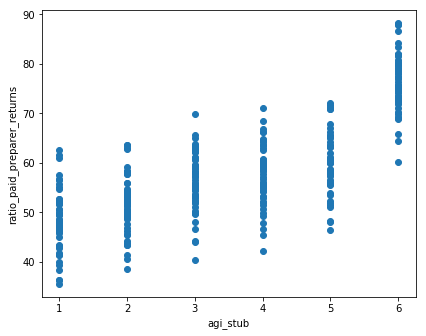

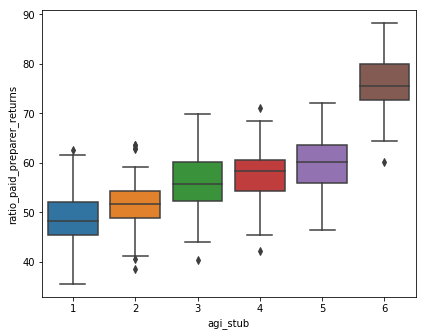

In [258]:
# scatterplot
plt.scatter(stats_for_states['agi_stub'], stats_for_states['ratio_paid_preparer_returns'], alpha=1)
plt.xlabel("agi_stub")
plt.ylabel("ratio_paid_preparer_returns")
plt.show()

# boxplot
rcParams['figure.figsize'] = 6.7,5.27
sns.boxplot(x='agi_stub', y='ratio_paid_preparer_returns', data=stats_for_states)

From the scatterplot and boxplot above, we can see the same trend we saw in the heatmap that tax returns in the agi_stub category 6 are mostly prepared by the tax stores and accountants. The trend is increasing with the increase of agi_stub category. 